# GRIP @ The Sparks Foundation Task 6

### Topic: Prediction using Decision Tree algorithm

### Author: Anjali Agarwal

## 1. Importing the libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## 2. Loading the Iris dataset

In [3]:
Iris=pd.read_csv('C:\Iris.csv')

In [4]:
Iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
Iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Checking out the null values in the dataset

In [8]:
Iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## 3. Training the model

In [9]:
features=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
# Create features matrix
x=Iris.loc[:, features].values

In [10]:
y=Iris.Species

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x, y, random_state=0)

In [12]:
clf=DecisionTreeClassifier(max_depth=2,random_state=0)

In [13]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [14]:
clf.predict(x_test[0:3])

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [15]:
from sklearn import metrics

In [16]:
score=clf.score(x_test, y_test)
print(score)

0.8947368421052632


In [17]:
print(metrics.classification_report(y_test,clf.predict(x_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.83      0.94      0.88        16
 Iris-virginica       0.86      0.67      0.75         9

       accuracy                           0.89        38
      macro avg       0.90      0.87      0.88        38
   weighted avg       0.90      0.89      0.89        38



## 4. Visualizing the data

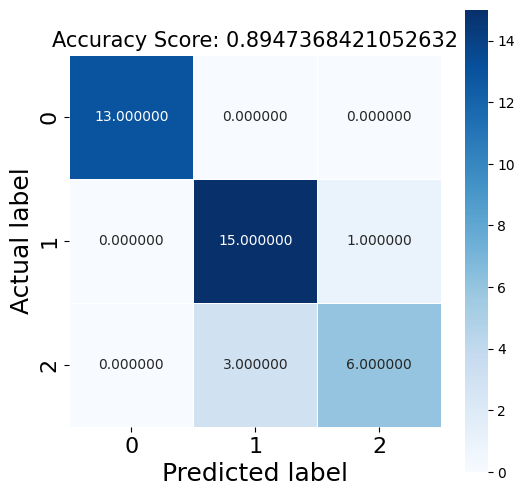

In [18]:
cm=metrics.confusion_matrix(y_test, clf.predict(x_test))
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="0f", linewidths=.5, square= True, cmap='Blues');
plt.xlabel('Predicted label', fontsize=18);
plt.ylabel('Actual label', fontsize=18);
plt.title('Accuracy Score: {}'.format(score),size=15);
plt.tick_params(labelsize=16)

In [19]:
# list of values to try for max_depth:
max_depth_range=list(range(1,6))

# list to store the average RMSE for each value of max_depth:
accuracy=[]
for depth in max_depth_range:
    clf=DecisionTreeClassifier(max_depth = depth,random_state = 0)
    clf.fit(x_train, y_train)
    score=clf.score(x_test, y_test)
    accuracy.append(score)

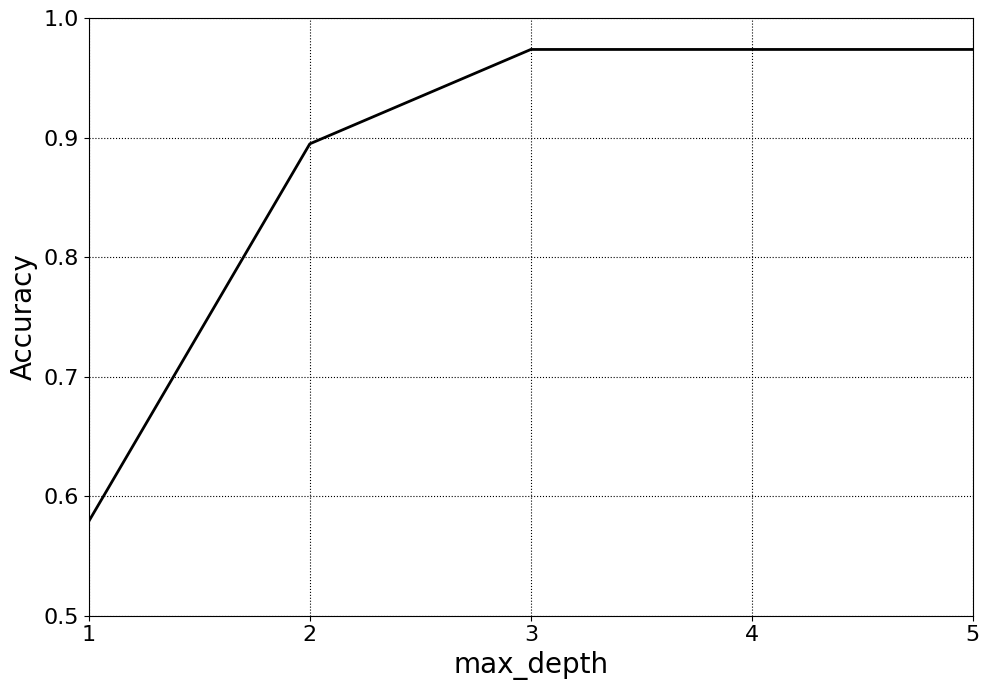

In [29]:
# plotting accuracy score depth wise
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(10,7));

ax.plot(max_depth_range, accuracy, lw=2, color='k')

ax.set_xlim([1,5])
ax.set_ylim([.5,1])
ax.grid(True, axis = 'both', zorder = 0, linestyle = ':', color = 'k')

ax.tick_params(labelsize =16)
ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('max_depth', fontsize = 20)
ax.set_ylabel('Accuracy', fontsize = 20)
fig.tight_layout()


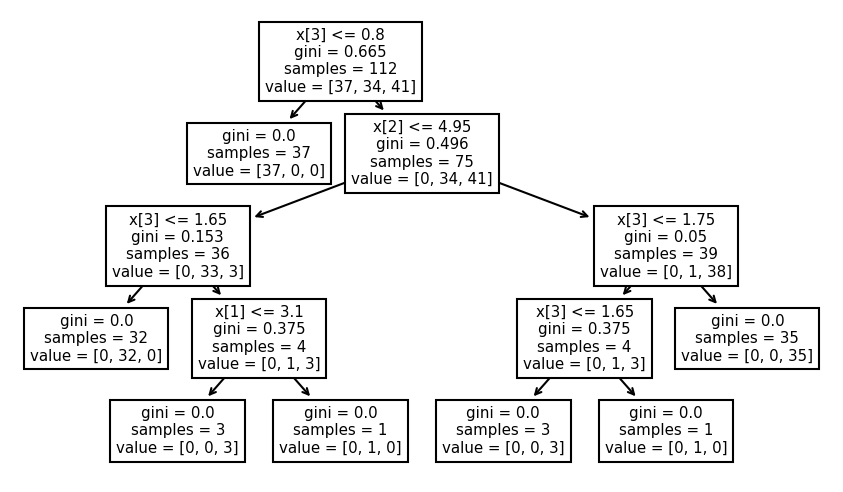

In [31]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (7,4), dpi = 150)
tree.plot_tree(clf);

In [32]:
fn = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn = ['setosa', 'versicolor', 'virginica']

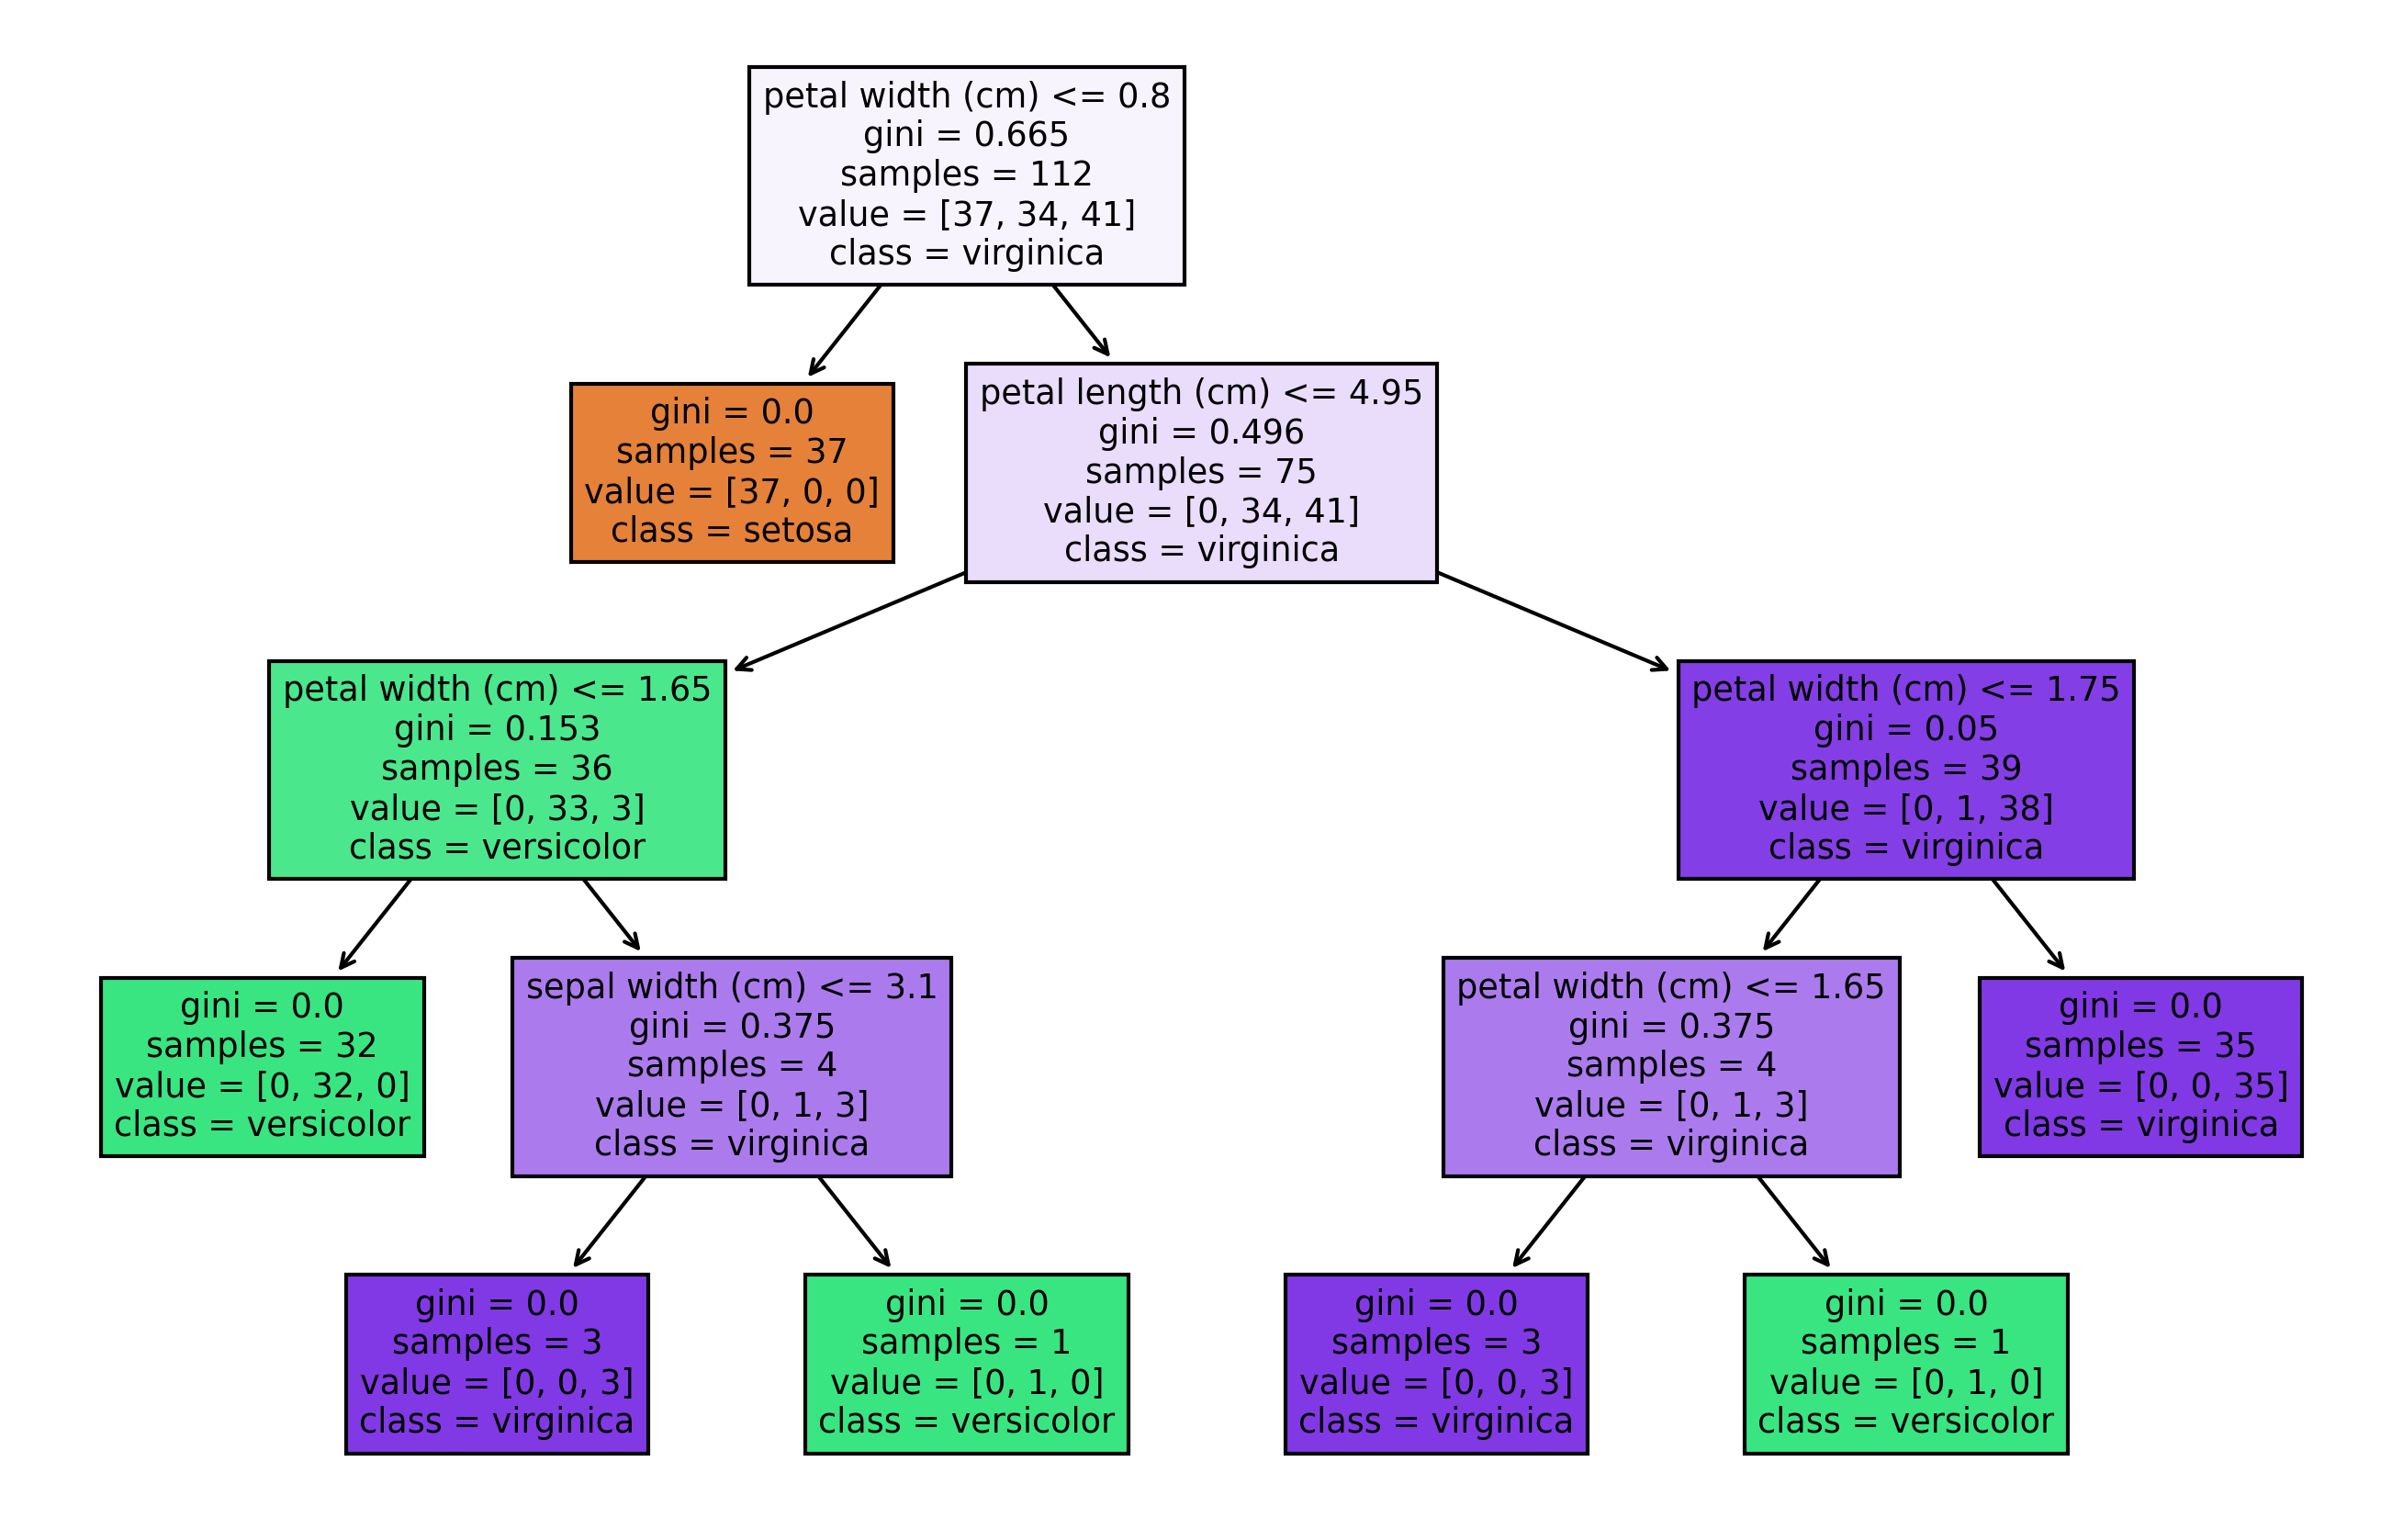

In [33]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (11,7), dpi = 300)
tree.plot_tree(clf,feature_names = fn, class_names=cn, filled =True);

### Thank You!